In [11]:
import pandas as pd

In [ ]:
df = pd.read_csv("Women_s_E-Commerce_Clothing_Reviews_1594_1.csv",sep=';')

In [ ]:
df.head()

,Unnamed: 0,Clothing.ID,Age,Title,Review.Text,Rating,Recommended.IND,Positive.Feedback.Count,Division.Name,Department.Name,Class.Name
0,1,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,2,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,3,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,4,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,5,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


# EDA

In [ ]:
df.dropna(inplace=True)

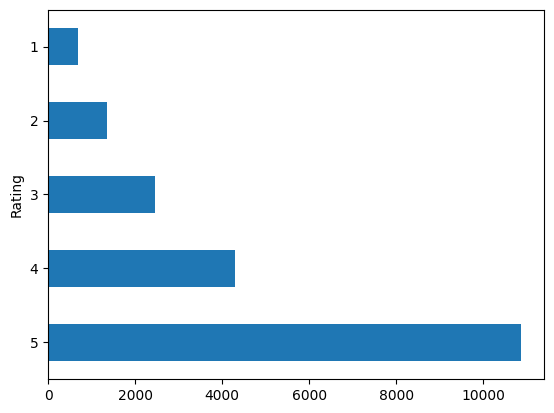

In [ ]:
df['Rating'].value_counts().plot.barh();

In [ ]:
for index,text in enumerate(df['Review.Text'][0:5]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c
Review 2:
 I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!
Review 3:
 This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!
Review 4:
 I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. thi

In [ ]:
df['punctuation_used'] = df['Review.Text'].str.findall(r'[^\w\s]').str.join(", ")
df['number_string'] = df['Review.Text'].str.findall(r'[0-9]').str.join(", ")

In [ ]:
df['punctuation_used']

2                 ., (, ), ., !, ,, ., ,, ,, (, ), ., ,, -
3                                ,, ,, ., ', ,, ,, !, ,, !
4                                            ., ., !, !, !
5                                ,, ., ., ., ., ,, ., ., .
6        ., (, ), ., :, -, ), ,, ., (, ,, ), ., ,, ,, ....
                               ...                        
23481                                              !, ', .
23482                   ., ,, ,, ., ., ., ., ., ., ., ., .
23483                               ,, ., ., ', ', ., ,, .
23484                   ,, ', ., ', ., ,, ., ,, ,, ., -, !
23485                                           ,, ,, !, !
Name: punctuation_used, Length: 19662, dtype: object

In [ ]:
tanda_baca = df['punctuation_used'].nunique()
jumlah_angka = df['number_string'].nunique()

In [ ]:
print(f'Jumlah tanda baca dalam data: {tanda_baca}')
print(f'Jumlah angka dalam data: {jumlah_angka}')

Jumlah tanda baca dalam data: 15019
Jumlah angka dalam data: 3283


# Preprocessig Text

In [ ]:
def caseFolding(text):
  text=text.lower()
  return text


import re
def punc_removal(text):
  text=re.sub(r"[^a-zA-Z]"," ",text)
  return text

# import StemmerFactory class

# create stemmer
import nltk
from nltk import *
stemmer = PorterStemmer()
def stemsWords(text):
  text=stemmer.stem(text)
  return text

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('stopwords')
stp=stopwords.words('english')

def flatten(l):
    """
    Same as
    flat_list = []
    for sublist in l:
    for item in sublist:
        flat_list.append(item)

    Example =[[1,2,3,4,5]] - > [1,2,3,4,5]
    """
    return " ".join([item for sublist in l for item in sublist])

def remove_stop_words(text):
  stopWords_combine=stp
  clean_words = []
  text=text.split()
  perulangan_text=[word for word in text if word not in stopWords_combine]
  clean_words.append(perulangan_text)
  return flatten(clean_words)

def preprocessing_text(text):
  # text=caseFolding(text)
  text=punc_removal(text)
  text=remove_stop_words(text)
  text=stemsWords(text)
  return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Reza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Reza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df_text = df[["Review.Text", "Rating"]]


In [ ]:
df_text["clean_text"] = df_text["Review.Text"].apply(preprocessing_text)

C:\Users\Reza\AppData\Local\Temp\ipykernel_15836\908015638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text["clean_text"] = df_text["Review.Text"].apply(preprocessing_text)


In [ ]:
df_text["clean_text"]

2        i high hopes dress really wanted work initiall...
3        i love love love jumpsuit fun flirty fabulous ...
4        this shirt flattering due adjustable front tie...
5        i love tracy reese dresses one petite feet tal...
6        i aded basket hte last mintue see would look l...
                               ...                        
23481    i happy snag dress great price easy slip flatt...
23482    it reminds maternity clothes soft stretchy shi...
23483    this fit well top see never would worked glad ...
23484    i bought dress wedding summer cute unfortunate...
23485    this dress lovely platinum feminine fits perfe...
Name: clean_text, Length: 19662, dtype: object

In [5]:
def rating_to_sentiment(rating):
    df = {
       1:"Negative",
       2:"Negative",
       3:"Netral" ,
       4:"Positive",
       5:"Positive"
    }
    return df.get(rating)

In [6]:
def sentiment_encoder(rating):
    df = {
       "Negative":0,
       "Netral":1,
       "Positive":2,
    }
    return df.get(rating)

In [ ]:
df_text["Label"] = df_text["Rating"].apply(rating_to_sentiment)

C:\Users\Reza\AppData\Local\Temp\ipykernel_15836\3199579502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text["Label"] = df_text["Rating"].apply(rating_to_sentiment)


# Model build

## Distibert

### Tensorflow

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
from transformers import DistilBertTokenizer
from transformers import TFDistilBertForSequenceClassification
import tensorflow as tf
import os
os.environ["TF_USE_LEGACY_KERAS"] = '1'

In [14]:
DATA_PATH = "cleaned_data.csv"

In [15]:
df_text = pd.read_csv(DATA_PATH)

In [16]:
df_text["encoded"] = df_text["Label"].apply(sentiment_encoder)

In [17]:
df_text_ready = df_text

In [18]:
data_texts = df_text_ready["clean_text"].to_list()
data_labels = df_text_ready["encoded"].to_list()

In [19]:
train_texts, val_texts, train_labels, val_labels = train_test_split(data_texts, data_labels, test_size=0.1, random_state=0, shuffle=True)
train_texts, test_texts, train_labels, test_labels= train_test_split(train_texts, train_labels, test_size=0.01, random_state=0, shuffle=True)


[distil_bert_base_en_uncased](https://www.kaggle.com/models/keras/distil_bert)
* 6-layer model where all input is lowercased.
* 66.36M

In [20]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings = tokenizer(val_texts, truncation=True, padding=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [21]:
train_dataset = tf.data.Dataset.from_tensor_slices((
dict(train_encodings),
train_labels
))
val_dataset = tf.data.Dataset.from_tensor_slices((
dict(val_encodings),
val_labels
))

In [22]:
train_dataset

<_TensorSliceDataset element_spec=({'input_ids': TensorSpec(shape=(77,), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(77,), dtype=tf.int32, name=None)}, TensorSpec(shape=(), dtype=tf.int32, name=None))>

In [23]:
val_dataset

<_TensorSliceDataset element_spec=({'input_ids': TensorSpec(shape=(69,), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(69,), dtype=tf.int32, name=None)}, TensorSpec(shape=(), dtype=tf.int32, name=None))>

In [24]:
labels = df_text.encoded.nunique()

In [25]:

model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=labels )
# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/2)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5, epsilon=1e-08)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.compile(optimizer=optimizer,
              loss=model.hf_compute_loss,
              metrics=['accuracy'])

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [26]:
model.fit(train_dataset.shuffle(10000).batch(16),
epochs=2,
batch_size=16,
validation_data=val_dataset.shuffle(10000).batch(16),
callbacks=[early_stopping])

Epoch 1/2


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1095/1095 [==============================] - 229s 162ms/step - loss: 0.4761 - accuracy: 0.8065 - val_loss: 0.4798 - val_accuracy: 0.8256
Epoch 2/2
1095/1095 [==============================] - 161s 147ms/step - loss: 0.3683 - accuracy: 0.8394 - val_loss: 0.4270 - val_accuracy: 0.8348


In [27]:
!mkdir Multitext_Classification_colab

In [28]:
from tensorflow.keras.models import load_model
save_directory = "Multitext_Classification_colab" # Change this to your preferred location

model.save_pretrained(save_directory)
tokenizer.save_pretrained(save_directory)

('Multitext_Classification_colab/tokenizer_config.json',
 'Multitext_Classification_colab/special_tokens_map.json',
 'Multitext_Classification_colab/vocab.txt',
 'Multitext_Classification_colab/added_tokens.json')

In [29]:

save_directory = "Multitext_Classification_colab"
loaded_tokenizer = DistilBertTokenizer.from_pretrained(save_directory)
loaded_model = TFDistilBertForSequenceClassification.from_pretrained(save_directory)

Some layers from the model checkpoint at Multitext_Classification_colab were not used when initializing TFDistilBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at Multitext_Classification_colab and are newly initialized: ['dropout_39']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [30]:
df_text_ready.encoded.value_counts()

encoded
2    15147
1     2464
0     2051
Name: count, dtype: int64

In [31]:
def prediction_get(pred):
  result = {
      0:"Negative",
      1:"Netral",
      2:"Positve"
  }
  return result.get(pred)

In [32]:
def predict(text):
  predict_input = loaded_tokenizer.encode(text,
  truncation=True,
  padding=True,
  return_tensors="tf")

  output = loaded_model(predict_input)[0]

  prediction_value = tf.argmax(output, axis=1).numpy()[0]
  return prediction_value

In [33]:
for texts in test_texts:
  print(f'{texts} = {predict(texts)}' )

such pleasant surprise saw store try looks feels like lightweight real suede color wonderful neutral much prettier seeing pic fits tts although wear petites dresses pants found regular xs right = 2
this great beach pool lounge piece debated keeping pass comfortable hugging without tight probably wear sort layer like jean jack tied shirt rather undone unless beach comfortable straps bit long = 2
just review dress beautiful fabric light soft really perfect flowy tiered design colors really pretty bright fit perfectly would say much dressy appeared photos bodice beading much longer model though still perfect maxi length would perfect wear wedding formal affair = 2
this absolutely fabulous skirt cant wait wear biggest challenge finding best way accessorize artist lots clothing created ab fab combo yet = 2
i purchased violet chino local store color plum violet nice shade still fit perfect oh comfortable bought size weight fluxes see several pairs colors comfort level work fall spring summer

### Evaluation

In [34]:
y_pred = []
for texts in test_texts:
  y_pred.append(predict(texts))

In [35]:
data_pred = pd.DataFrame({
    "text":test_texts,
    "prediksi":y_pred
})

In [36]:
data_pred

,text,prediksi
0,such pleasant surprise saw store try looks fee...,2
1,this great beach pool lounge piece debated kee...,2
2,just review dress beautiful fabric light soft ...,2
3,this absolutely fabulous skirt cant wait wear ...,2
4,i purchased violet chino local store color plu...,2
...,...,...
172,this top much prettier dress run tad large lbs...,2
173,i reservations top based reviews looked cute m...,0
174,i agree reviewer belted part definitely gives ...,2
175,i several pairs coh love saw go sale size quic...,2


In [37]:
from sklearn.metrics import classification_report

In [38]:
print(classification_report(test_labels,y_pred))

              precision    recall  f1-score   support

           0       0.53      0.47      0.50        17
           1       0.59      0.29      0.39        34
           2       0.84      0.97      0.90       126

    accuracy                           0.79       177
   macro avg       0.65      0.58      0.60       177
weighted avg       0.76      0.79      0.76       177



In [39]:
!zip -r /content/model_load.zip /content/Multitext_Classification_colab


  adding: content/Multitext_Classification_colab/ (stored 0%)
  adding: content/Multitext_Classification_colab/special_tokens_map.json (deflated 42%)
  adding: content/Multitext_Classification_colab/tf_model.h5 (deflated 8%)
  adding: content/Multitext_Classification_colab/config.json (deflated 48%)
  adding: content/Multitext_Classification_colab/vocab.txt (deflated 53%)
  adding: content/Multitext_Classification_colab/tokenizer_config.json (deflated 75%)


In [40]:
from google.colab import files
files.download("/content/model_load.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# K train

In [41]:
# Loading from ktrain
# import os
# os.environ["TF_USE_LEGACY_KERAS"] = '1'
# from ktrain import text
# from ktrain.text import  texts_from_csv

In [42]:
# df_text = df_text[["clean_text", "Label"]]
# LABEL_COLUMNS = df_text["Label"].unique().tolist()
# TEXT_COLUMNS = df_text["clean_text"]

In [43]:
# LABEL_COLUMNS

In [44]:
# df_text.to_csv("cleaned_data.csv")

In [45]:
# DATA_PATH = "cleaned_data.csv"

In [46]:
# train, val, preprocess = texts_from_csv(
#     DATA_PATH,
#     text_column="clean_text",
#     label_columns=["Label"],
#     val_filepath=None,
#     max_features=20000,
#     maxlen=128,
#     ngram_range=1,
#     preprocess_mode="distilbert",
# )

In [47]:
# import ktrain

In [48]:
# model = ktrain.text.text_classifier('distilbert', train_data=train, preproc=preprocess)
# learner = ktrain.get_learner(model, train_data=train, val_data=val, batch_size = 8)

In [49]:
# # Using learner.lr_find to optimize the learning rate
# learner.lr_find(max_epochs=6)